In [31]:
import pandas
%pylab inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

Populating the interactive namespace from numpy and matplotlib


## Let's take a look at some of the data we have

In [32]:
N = 5e6
data = pandas.read_csv('data/trip_data_1.csv')
fare_data = pandas.read_csv("data/trip_fare_1.csv", nrows=N)

In [33]:
fare_data[:5]

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,2013-01-01 15:11:48,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-06 00:18:35,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-05 18:49:41,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:54:15,CSH,5.0,0.5,0.5,0.0,0.0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:25:03,CSH,9.5,0.5,0.5,0.0,0.0,10.5


In [34]:
fare_cols = [u' payment_type', u' fare_amount', u' surcharge', u' mta_tax', u' tip_amount', u' tolls_amount', u' total_amount']
data = data.join(fare_data[fare_cols])
del fare_data
data[:10]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,...,40.757977,-73.989838,40.751171,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,...,40.731781,-73.994499,40.750660,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,...,40.737770,-74.009834,40.726002,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,...,40.759945,-73.984734,40.759388,CSH,5.0,0.5,0.5,0.0,0.0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,...,40.748528,-74.002586,40.747868,CSH,9.5,0.5,0.5,0.0,0.0,10.5
5,20D9ECB2CA0767CF7A01564DF2844A3E,598CCE5B9C1918568DEE71F43CF26CD2,CMT,1,N,2013-01-07 15:27:48,2013-01-07 15:38:37,1,648,1.7,...,40.764252,-73.983322,40.743763,CSH,9.5,0.0,0.5,0.0,0.0,10.0
6,496644932DF3932605C22C7926FF0FE0,513189AD756FF14FE670D10B92FAF04C,CMT,1,N,2013-01-08 11:01:15,2013-01-08 11:08:14,1,418,0.8,...,40.743977,-74.007416,40.744343,CSH,6.0,0.0,0.5,0.0,0.0,6.5
7,0B57B9633A2FECD3D3B1944AFC7471CF,CCD4367B417ED6634D986F573A552A62,CMT,1,N,2013-01-07 12:39:18,2013-01-07 13:10:56,3,1898,10.7,...,40.756775,-73.865250,40.770630,CSH,34.0,0.0,0.5,0.0,4.8,39.3
8,2C0E91FF20A856C891483ED63589F982,1DA2F6543A62B8ED934771661A9D2FA0,CMT,1,N,2013-01-07 18:15:47,2013-01-07 18:20:47,1,299,0.8,...,40.743137,-73.982712,40.735336,CSH,5.5,1.0,0.5,0.0,0.0,7.0
9,2D4B95E2FA7B2E85118EC5CA4570FA58,CD2F522EEE1FF5F5A8D8B679E23576B3,CMT,1,N,2013-01-07 15:33:28,2013-01-07 15:49:26,2,957,2.5,...,40.786983,-73.952919,40.806370,CSH,13.0,0.0,0.5,0.0,0.0,13.5


It looks like medallion and hack_license are unique ids but they may not be beneficial for most of our efforts. 

In [35]:
data.loc[:5, data.columns[:5]]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N
5,20D9ECB2CA0767CF7A01564DF2844A3E,598CCE5B9C1918568DEE71F43CF26CD2,CMT,1,N


(0, 300)

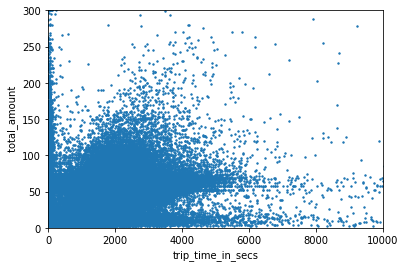

In [36]:
#let's plot time and total amount
data.plot(x="trip_time_in_secs", y=" total_amount", kind="scatter", s=2)
xlim(0, 1e4)
ylim(0, 300)

In [37]:
ind = where(logical_and(data.trip_time_in_secs < 500, data[' total_amount'] > 30))[0]
print(ind)

[    324     473     496 ..., 4999601 4999688 4999964]


In [38]:
data = data.drop(ind)

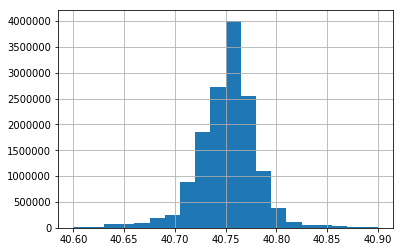

In [39]:
data[logical_and(data.dropoff_latitude > 40.6, data.dropoff_latitude < 40.9)].dropoff_latitude.hist(bins=20)

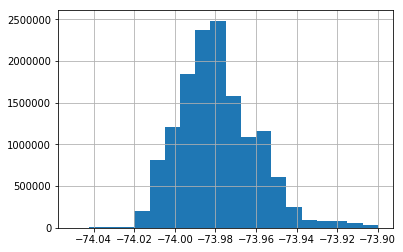

In [40]:
data[logical_and(data.dropoff_longitude > -74.05, data.dropoff_longitude < -73.9)].dropoff_longitude.hist(bins=20)

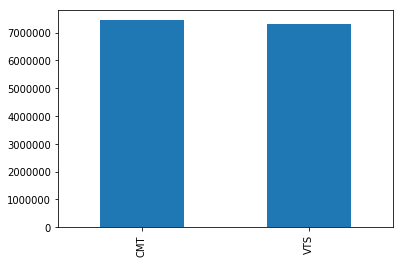

In [41]:
data.vendor_id.value_counts().plot(kind='bar');

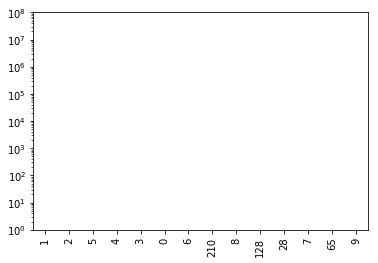

In [42]:
data.rate_code.value_counts().plot(kind='bar', logy=True, ylim=(1,1e8))

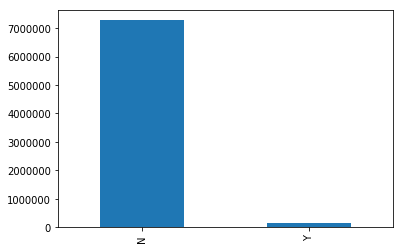

In [43]:
data.store_and_fwd_flag.value_counts().plot(kind="bar")

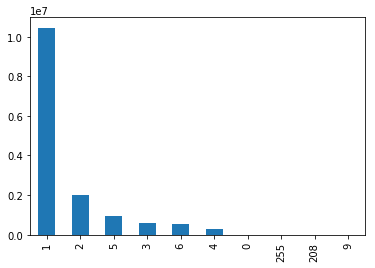

In [44]:
data.passenger_count.value_counts().plot(kind='bar')

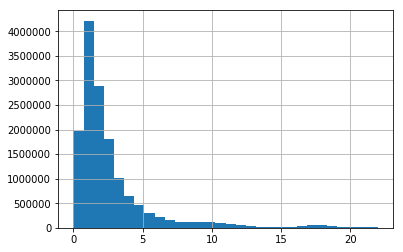

In [45]:
data.trip_distance[data.trip_distance < 22].hist(bins=30);

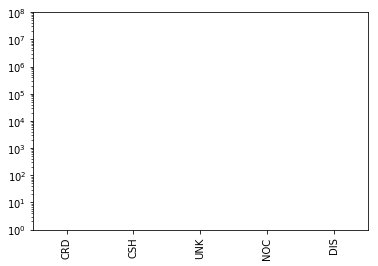

In [46]:
data[' payment_type'].value_counts().plot(kind="bar", logy=True, ylim=(1, 1e8))

(0, 40)

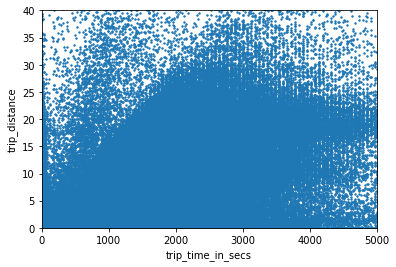

In [47]:
data.plot(x="trip_time_in_secs", y="trip_distance", kind="scatter", s=2)
xlim(0,5000)
ylim(0,40)

(-74.05, -73.9)

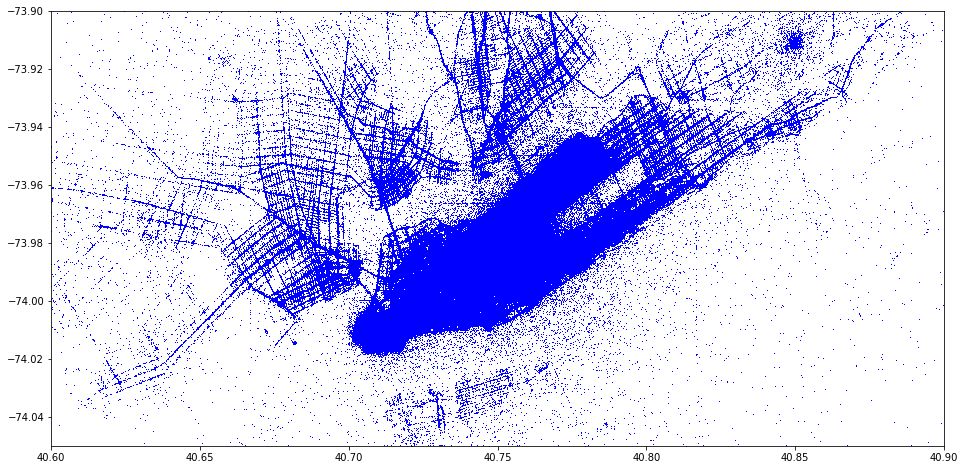

In [48]:
figure(figsize=(16,8))
plot(data['pickup_latitude'], data['pickup_longitude'], 'b,')
xlim(40.6, 40.9)
ylim(-74.05, -73.9)


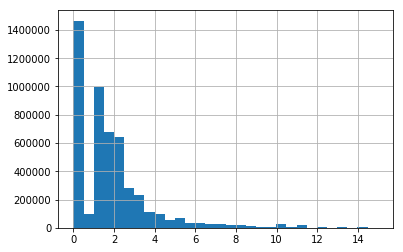

In [49]:
data[data[' tip_amount'] < 15][' tip_amount'].hist(bins=30)

In [50]:
len(data)

14761099

In [51]:
data = data[data[' payment_type'] != 'CSH']

In [52]:
data.reset_index(inplace=True, drop=True)

In [53]:
len(data)

13395995

### Modeling

Let's build a model that shows whether a taxi driver will get a tip or not. To do this we should focus on a binary classifier. 

##### Cash vs Credit Card

Intuitively earlier data would suggest that if you paid with a credit card you wouldn't tip while with cash you would just round up the dollar amount. 

If you look at CASH vs credit cards however 95% of credit cards pay. Where 0 of cash based fares gave a tip. So the best way to handle this is to simply remove the cash fares. 



In [54]:
data['tipped'] = (data[' tip_amount'] > 0).astype('int')

In [55]:
data['tipped'].value_counts()

0    9868627
1    3527368
Name: tipped, dtype: int64

In [63]:
feats1 = [u'rate_code', 'passenger_count', u'trip_time__in_secs', 
          u'trip_distance', u'pickup_longitude', u'pickup_latitude', 
          u'dropoff-longitude', u'dropoff_latitude', ' fare_amount', 
          u' surcharge', u' mta_tax', ' tolls_amount']

In [64]:
M = len(data)

In [65]:
rand_idx = arange(M)
random.shuffle(rand_idx)

In [66]:
train_idx = rand_idx[int(M*0.2):]
test_idx = rand_idx[:int(M*0.2)]

In [67]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [68]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data[feats1])
data_scaled[train_idx.tolist(),:].shape

KeyError: "['trip_in_time_in_secs' 'dropoff-longitude'] not in index"